In [ ]:
!pip install scikit-plot
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection

import scikitplot as skplt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender-prediction.csv')
New_df = df
df

In [ ]:
New_df = New_df.drop(['beard','hair_length','scarf','eye_color','gender'], axis=1)
New_df

labels = LabelEncoder()
beard_encoded = labels.fit_transform(df['beard'])
hair_length_encoded = labels.fit_transform(df['hair_length'])
scarf_encoded = labels.fit_transform(df['scarf'])
eye_color_encoded = labels.fit_transform(df['eye_color'])
gender_encoded = labels.fit_transform(df['gender'])

New_df['beard'] = beard_encoded
New_df['hair_length'] = hair_length_encoded
New_df['scarf'] = scarf_encoded
New_df['eye_color'] = eye_color_encoded
New_df['gender'] = gender_encoded
New_df

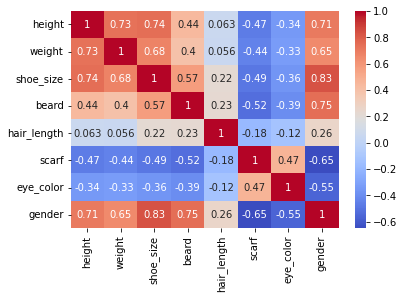

In [ ]:
corr = New_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
New_df = New_df.drop(['beard','hair_length','shoe_size','scarf','eye_color','gender'], axis=1)
New_df

,height,weight
0,71,176
1,68,165
2,62,132
3,65,138
4,70,197
...,...,...
75,65,99
76,61,98
77,67,119
78,70,190


In [ ]:
labels = LabelEncoder()
scarf_encoded = labels.fit_transform(df['scarf'])
hair_length_encoded = labels.fit_transform(df['hair_length'])
eye_color_encoded = labels.fit_transform(df['eye_color'])
gender_encoded = labels.fit_transform(df['gender'])

New_df['hair_length'] = hair_length_encoded
New_df['scarf'] = scarf_encoded
New_df['eye_color'] = eye_color_encoded
New_df['gender'] = gender_encoded
New_df

,height,weight,hair_length,scarf,eye_color,gender
0,71,176,3,0,0,1
1,68,165,0,0,0,1
2,62,132,2,1,1,0
3,65,138,1,0,3,0
4,70,197,2,0,3,1
...,...,...,...,...,...,...
75,65,99,3,1,4,0
76,61,98,3,0,2,0
77,67,119,3,0,0,1
78,70,190,2,0,3,1


In [ ]:
x = New_df.drop('gender', axis=1)
y = New_df['gender']

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
model = RandomForestClassifier()

model.fit(X_train,Y_train)
prediction = model.predict(x_test)

model_cl_rep = metrics.classification_report(y_test, prediction)
print(model_cl_rep)

model_cm = metrics.confusion_matrix(y_test, prediction)
print(model_cm)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.90      0.95        10

    accuracy                           0.94        16
   macro avg       0.93      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16

[[6 0]
 [1 9]]


 NO CHANGE IN RANDOM FOREST AFTER DROPPING THE 2 ATTRIBUTES

In [ ]:
model = SVC()

model.fit(X_train,Y_train)
prediction = model.predict(x_test)

model_cl_rep = metrics.classification_report(y_test, prediction)
print(model_cl_rep)

model_cm = metrics.confusion_matrix(y_test, prediction)
print(model_cm)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.82      0.90      0.86        10

    accuracy                           0.81        16
   macro avg       0.81      0.78      0.79        16
weighted avg       0.81      0.81      0.81        16

[[4 2]
 [1 9]]


 NO CHANGE IN SVC AFTER DROPPING THE 2 ATTRIBUTES

In [ ]:
model = LinearSVC()

model.fit(X_train,Y_train)
prediction = model.predict(x_test)

model_cl_rep = metrics.classification_report(y_test, prediction)
print(model_cl_rep)

model_cm = metrics.confusion_matrix(y_test, prediction)
print(model_cm)

 NO CHANGE IN LinearSVC AFTER DROPPING THE 2 ATTRIBUTES

In [ ]:
model = MLPClassifier()

model.fit(X_train,Y_train)
prediction = model.predict(x_test)

model_cl_rep = metrics.classification_report(y_test, prediction)
print(model_cl_rep)

model_cm = metrics.confusion_matrix(y_test, prediction)
print(model_cm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      1.00      0.77        10

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16

[[ 0  6]
 [ 0 10]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 NO CHANGE IN MultiLayer Perceptron AFTER DROPPING THE 2 ATTRIBUTES